## 파이썬 지도학습
# 결정 트리 (Decision Tree)

- 앞에서 배운 k-NN, 로지스틱회귀, SVM 등은 **기하학**적 분포와 거리 개념에 기반한 분류 알고리즘입니다.
- 반면, 결정트리와 이에 기반한 알고리즘 들은 스무고개 놀이와 같이 계속 질문을 던져 가면서 예/아니오 를 판단하는 방식입니다. '예' 그룹인지 '아니오' 그룹인지가 중요하지 거리 개념은 기본적으로 없습니다.
- 예측 점수를 가장 높게 하고 싶을 때 우선 적용을 고려하는 것이 커널 SVM 이나 결정 트리 방식입니다. 현재 여러 머신러닝 대회에서 가장 결과 점수가 높은 방식이 결정트리에 기반한 알고리즘입니다.
- 결정트리는 거리를 재지 않고 두 구간으로 나누어 각 구간에 속할 확률을 따지기 때문에 정규화가 필요하지 않습니다.
- 결정트리의 도전과제는 가장 잘 두 그룹으로 분류하는 **속성**이 무엇인지 그리고 그 **경계값**을 어떻게 빨리 알아내는 가에 있습니다.
- 아래는 Iris 데이터를 결정트리로 분류한 결과 예시입니다.

In [1]:
import numpy as np
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
np.sort(iris.data[:,0])

array([4.3, 4.4, 4.4, 4.4, 4.5, 4.6, 4.6, 4.6, 4.6, 4.7, 4.7, 4.8, 4.8,
       4.8, 4.8, 4.8, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 5. , 5. , 5. , 5. ,
       5. , 5. , 5. , 5. , 5. , 5. , 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1,
       5.1, 5.1, 5.2, 5.2, 5.2, 5.2, 5.3, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4,
       5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.6, 5.6, 5.6, 5.6, 5.6, 5.6,
       5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.8, 5.8, 5.8, 5.8, 5.8,
       5.8, 5.8, 5.9, 5.9, 5.9, 6. , 6. , 6. , 6. , 6. , 6. , 6.1, 6.1,
       6.1, 6.1, 6.1, 6.1, 6.2, 6.2, 6.2, 6.2, 6.3, 6.3, 6.3, 6.3, 6.3,
       6.3, 6.3, 6.3, 6.3, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.5, 6.5,
       6.5, 6.5, 6.5, 6.6, 6.6, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7,
       6.8, 6.8, 6.8, 6.9, 6.9, 6.9, 6.9, 7. , 7.1, 7.2, 7.2, 7.2, 7.3,
       7.4, 7.6, 7.7, 7.7, 7.7, 7.7, 7.9])

<img src="ch02_11.png" />

- 결정트리는 데이터의 각 속성 중 하나의 속성을 선택해 판단기준을 세워 왼쪽, 오른쪽으로 가지치기를 합니다.
- 그래서 교재에도 나오지만, 한번 가지치기 할 때마다 수평, 수직 선을 그어 분류기준을 세웁니다.
- 결정트리는 한없이 깊어질 수 있기 때문에 기본값으로 적용시 훈련세트에 대해서 예측점수는 항상 100% 입니다. 즉 과대적합 되는 경향이 있습니다.
- 그렇기 때문에 가지의 깊이나 잎 수를 제한하는 등의 일반화 적용이 필요해 집니다.

### 용어 설명
- 위의 그림에서 각 네모박스 들을 노드(node) 라고 하고, 처음 노드를 루트노드(root node) 라고 합니다. 총 노드수는 15개 입니다.
- 그리고 몇단계로 가지치기를 하는지를 깊이(depth) 라고 하는데, 위의 그림은 총 5번을 수행했으므로 깊이가 5가 됩니다.
- 그리고 끝 부분에 있는 노드들을 잎노드(leaf node) 라고 하는데, 판단이 마지막으로 결정되는 곳입니다. 위 그림에서는 총 8개입니다.

### 결정트리의 키포인트
1. 어떤 속성으로 나눌 것인가?
2. 선정된 속성에서 어떤 값으로 나눌 것인가?

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

In [6]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
display(train_score, test_score)

1.0

0.8601398601398601

In [7]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
display(train_score, test_score)

0.9953051643192489

0.8811188811188811

In [8]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree.tree:

class DecisionTreeClassifier(BaseDecisionTree, sklearn.base.ClassifierMixin)
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_depth : int or None, optional (default=None)
 |      The maximum depth of the tree. If None, then nodes are expanded until
 |      all leaves are pure or until all leaves contain less than
 |      min_samples_split samples.
 |  
 |  min_samples_split : int, float, optional (default=2)

- 시각화를 위해 속성을 2개로 제한해 보겠습니다.

In [9]:
col1 = 0
col2 = 1

X_train, X_test, y_train, y_test = train_test_split(cancer.data[:,[col1,col2]],
                                                    cancer.target)

Text(0,0.5,'mean texture')

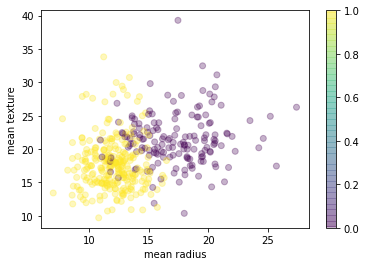

In [10]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.3)
plt.colorbar()
plt.xlabel(cancer.feature_names[col1])
plt.ylabel(cancer.feature_names[col2])

In [11]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
display(train_score, test_score)

1.0

0.8461538461538461

Text(0,0.5,'mean texture')

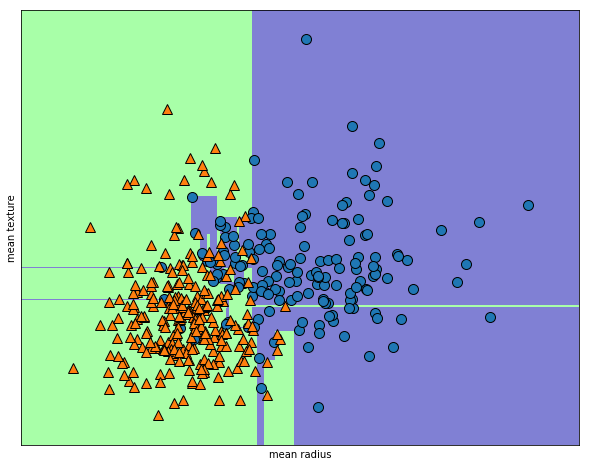

In [12]:
import mglearn

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X_train, alpha=0.5)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel(cancer.feature_names[col1])
plt.ylabel(cancer.feature_names[col2])

Text(0.5,1,'Cancer Test Data')

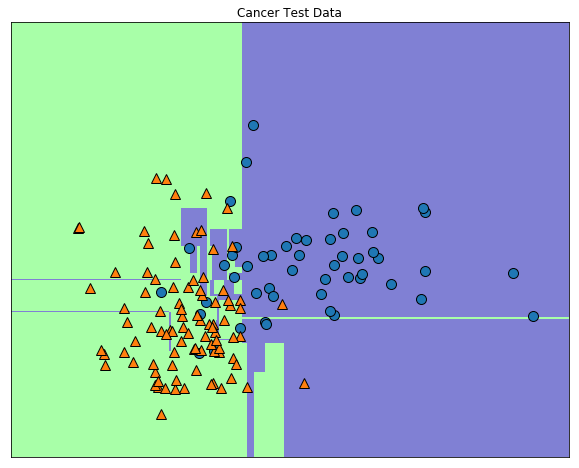

In [13]:
plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X_train, alpha=0.5)
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test)
plt.title('Cancer Test Data')

In [14]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
display(train_score, test_score)

0.9248826291079812

0.8601398601398601

Text(0,0.5,'mean texture')

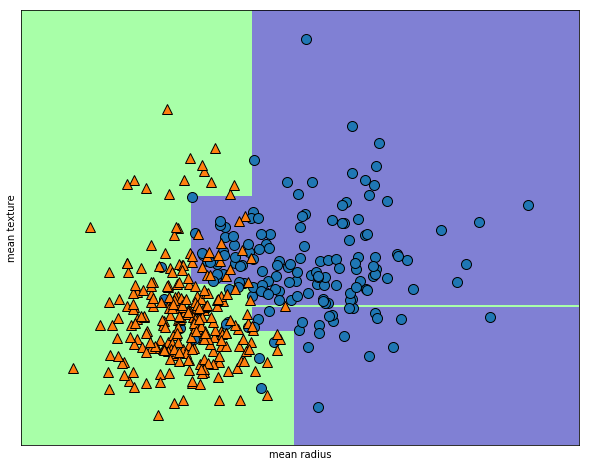

In [15]:
import mglearn

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X_train, alpha=0.5)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel(cancer.feature_names[col1])
plt.ylabel(cancer.feature_names[col2])

In [16]:
def draw_result_map(X, y, model, cols=['',''], title=''):
    scale = 300
    xmax = X[:,0].max()+1
    xmin = X[:,0].min()-1
    ymax = X[:,1].max()+1
    ymin = X[:,1].min()-1

    xx = np.linspace(xmin,xmax,scale)
    yy = np.linspace(ymin,ymax,scale)
    data1, data2 = np.meshgrid(xx,yy)
    X_grid = np.c_[data1.ravel(), data2.ravel()]
    
    pred_y = model.predict(X_grid)

    CS = plt.imshow(pred_y.reshape(scale,scale), interpolation=None, origin='lower',
                    extent=[xmin,xmax,ymin,ymax], alpha=0.3, cmap='gray_r')

    #fig=plt.figure(figsize=[12,10])
    
    # draw X
    plt.scatter(X[:,0], X[:,1], c=y, s=60)

    plt.xlabel(cols[0])
    plt.ylabel(cols[1])
    #plt.colorbar(CS, shrink=0.3)
    plt.title(title,fontsize=20)

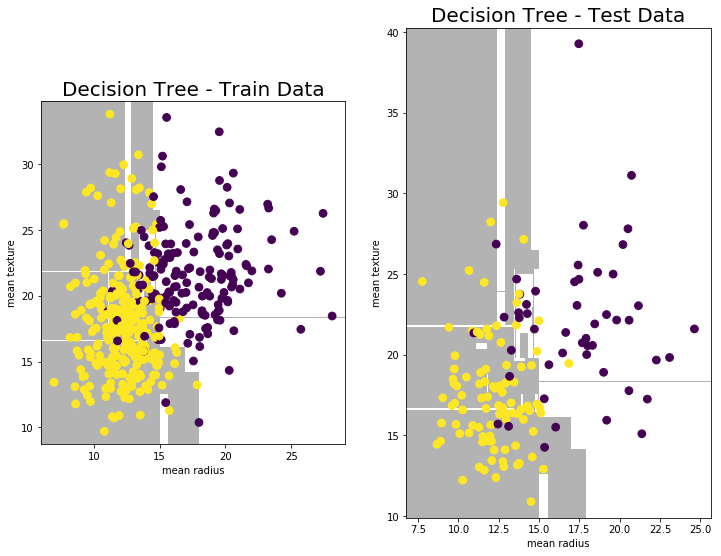

In [24]:
plt.figure(figsize=[12,10])

plt.subplot(1,2,1)
draw_result_map(X_train, y_train, model, [cancer.feature_names[col1],cancer.feature_names[col2]],
                'Decision Tree - Train Data')

plt.subplot(1,2,2)
draw_result_map(X_test, y_test, model, [cancer.feature_names[col1],cancer.feature_names[col2]],
                'Decision Tree - Test Data')

### 결정트리의 옵션들
- 결정트리의 기본은 모든 학습 데이터를 정확하게 분류할 때 까지 깊이가 깊어지므로 항상 학습 데이터에 대한 스코어가 100% 로 과적합됩니다.
- 아래에서 과적합을 피하기 위해 깊이를 제한하는 옵션인 max_depth 를 적용해 보겠습니다.

In [17]:
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

score_train = []
score_test = []

for depth in range(1,10):
    model = DecisionTreeClassifier(max_depth=depth, random_state=2020)
    model.fit(X_train, y_train)
    score1 = model.score(X_train,y_train)
    score2 = model.score(X_test, y_test)
    score_train.append(score1)
    score_test.append(score2)

Text(0.5,0,'max_depth')

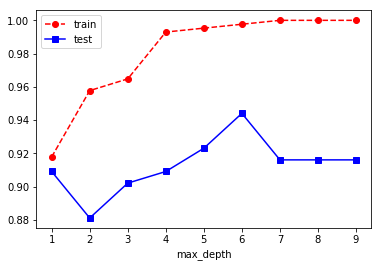

In [19]:
plt.plot(range(1,10), score_train, 'ro--')
plt.plot(range(1,10), score_test, 'bs-')
plt.legend(['train','test'])
plt.xticks(range(1,10), range(1,10))
plt.xlabel('max_depth')

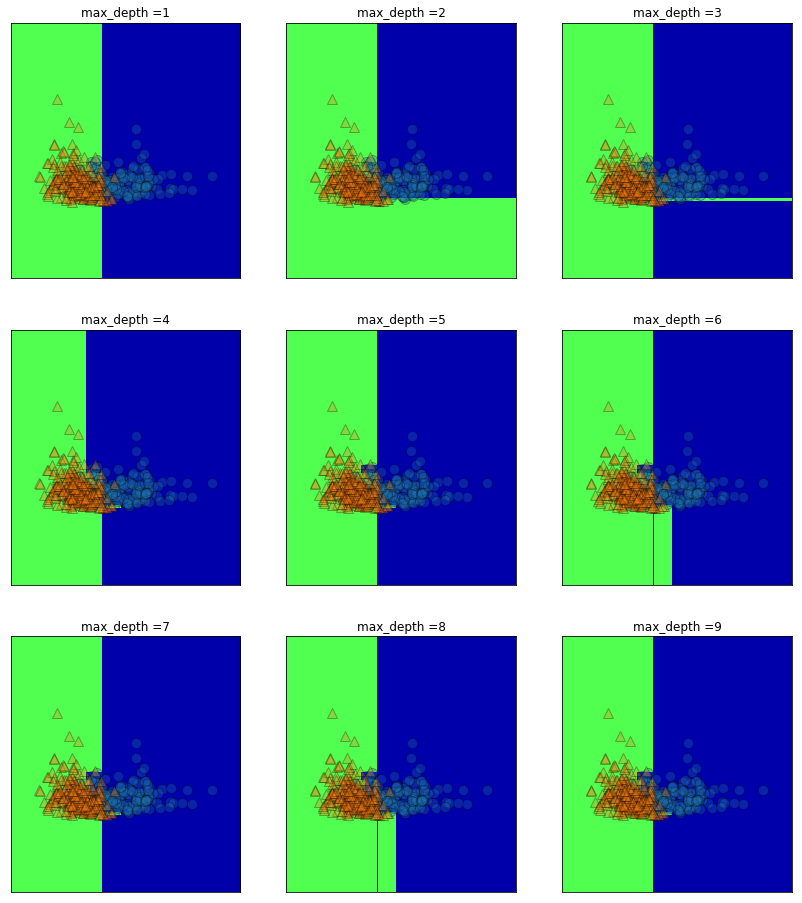

In [43]:
import mglearn

col1 = 0
col2 = 11

X_train, X_test, y_train, y_test = train_test_split(cancer.data[:,[col1,col2]], cancer.target)

plt.figure(figsize=[14,16])
for depth in range(1,10):
    model = DecisionTreeClassifier(max_depth=depth, random_state=2020)
    model.fit(X_train, y_train)
    
    plt.subplot(3,3,depth)
    plt.title('max_depth ='+str(depth))
    mglearn.plots.plot_2d_classification(model, X_train)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, alpha=0.3)

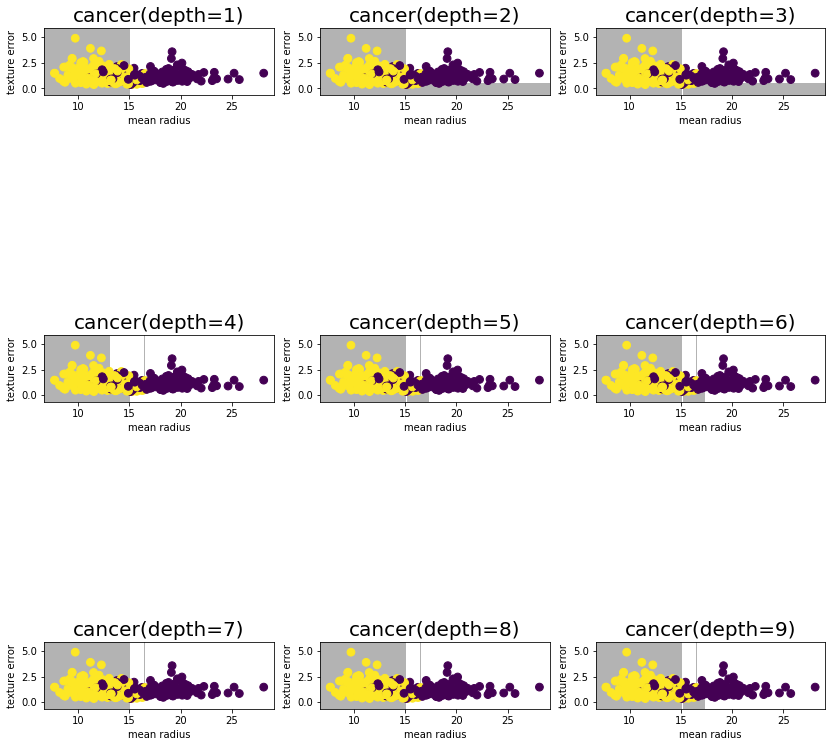

In [46]:
plt.figure(figsize=[14,16])
for depth in range(1,10):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    
    plt.subplot(3,3,depth)
    draw_result_map(X_train, y_train, model, [cancer.feature_names[col1],cancer.feature_names[col2]],
                'cancer(depth=%d)' % depth)

### 그래프 출력을 위한 graphviz 설치 방법

1. In anaconda prompt, run "pip install graphviz"
2. Install graphviz for windows (http://www.graphviz.org)
3. Add the graphviz dir(C:\Program Files (x86)\Graphviz2.38\bin) to windows PATH
4. Restart your anaconda prompt and jupyter notebook

In [20]:
import graphviz

In [21]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(cancer.data, cancer.target)

from sklearn.tree import export_graphviz

export_graphviz(model,out_file='tree2.dot',class_names=cancer.target_names,
                feature_names=cancer.feature_names,impurity=False,filled=True)

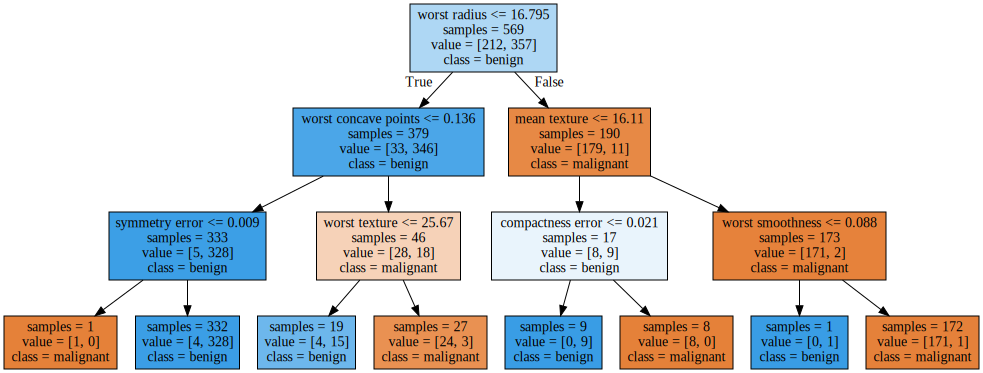

In [22]:
import graphviz

with open('tree2.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [23]:
# save dot to png
import graphviz
dot=graphviz.Source(dot_graph)
dot.format='png'
dot.render(filename='tree2')

'tree2.png'

In [156]:
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### DecisionTreeClassifier 주요 옵션
- max_depth
- max_leaf_nodes : 총 잎노드의 갯수를 제한한다
- min_samples_split : 만일 10이라면, 노드의 샘플 갯수가 10이상이 되어야 분기를 한다.
- min_samples_leaf : 10이라면, 잎노드의 샘플 갯수는 10이상이 되도록 만든다.
- max_features : 분기를 할 때 고려하는 속성의 갯수이다. 만일 2라면 판단할 속성을 고를때 랜덤하게 속성 2개만 뽑아 그 중에서 기준을 세운다.
- 아래에서 확인해 보자.

In [56]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree.tree:

class DecisionTreeClassifier(BaseDecisionTree, sklearn.base.ClassifierMixin)
 |  DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.

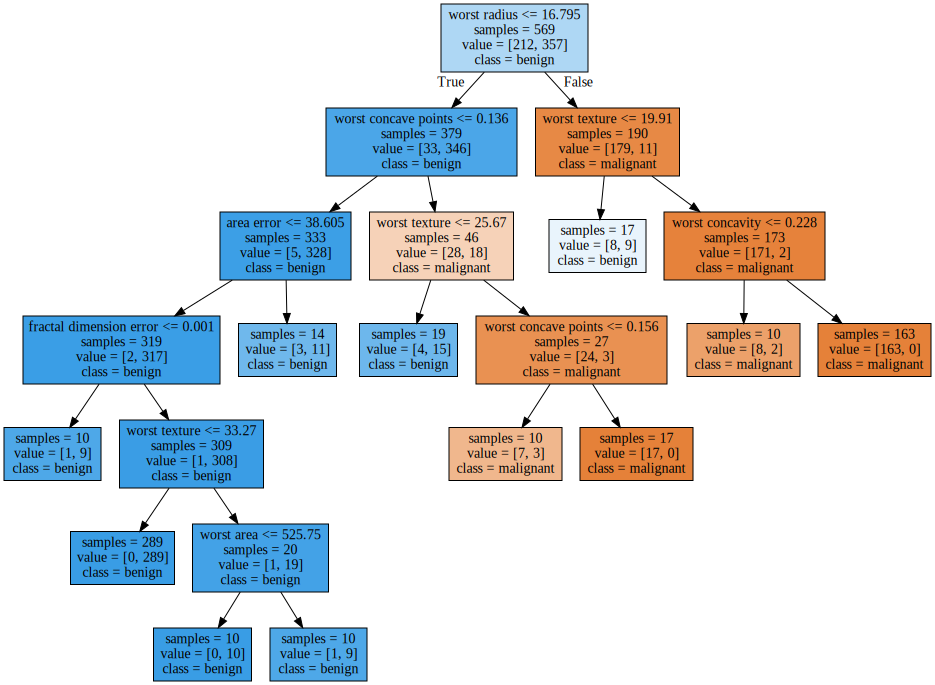

In [35]:
model = DecisionTreeClassifier(min_samples_leaf=10)
model.fit(cancer.data, cancer.target)

from sklearn.tree import export_graphviz

export_graphviz(model,out_file='tree1.dot',class_names=cancer.target_names,
                feature_names=cancer.feature_names,impurity=False,filled=True)

import graphviz

with open('tree1.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

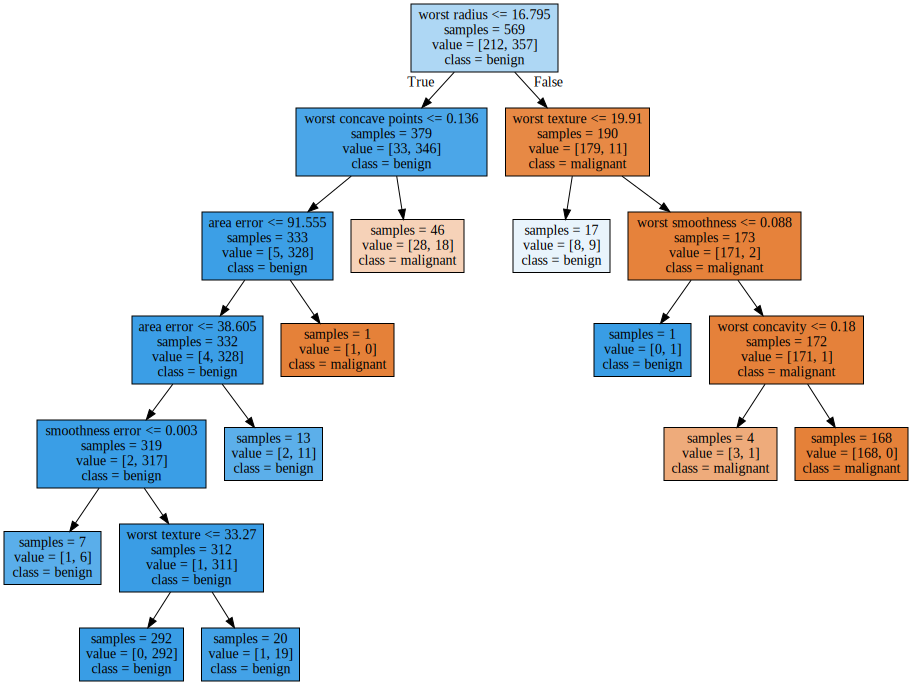

In [36]:
model = DecisionTreeClassifier(min_samples_split=50)
model.fit(cancer.data, cancer.target)

from sklearn.tree import export_graphviz

export_graphviz(model,out_file='tree1.dot',class_names=cancer.target_names,
                feature_names=cancer.feature_names,impurity=False,filled=True)

import graphviz

with open('tree1.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

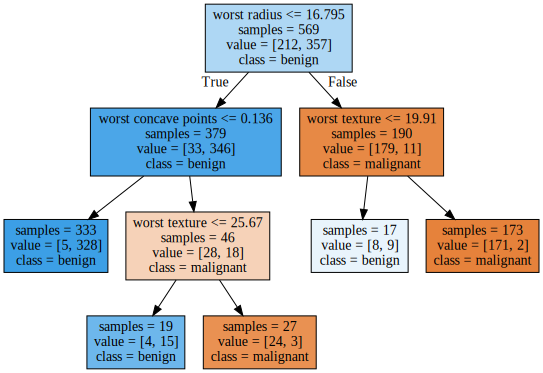

In [37]:
model = DecisionTreeClassifier(max_leaf_nodes=5)
model.fit(cancer.data, cancer.target)

from sklearn.tree import export_graphviz

export_graphviz(model,out_file='tree1.dot',class_names=cancer.target_names,
                feature_names=cancer.feature_names,impurity=False,filled=True)

import graphviz

with open('tree1.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

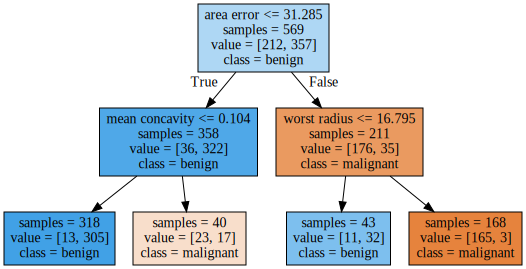

In [40]:
model = DecisionTreeClassifier(max_features=2, max_depth=2)
model.fit(cancer.data, cancer.target)

from sklearn.tree import export_graphviz

export_graphviz(model,out_file='tree1.dot',class_names=cancer.target_names,
                feature_names=cancer.feature_names,impurity=False,filled=True)

import graphviz

with open('tree1.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

### 기본 알고리즘
- 결정트리는 가장 잘 나누는 속성을 선택하고 경계값을 결정하기 위해 **엔트로피(entropy)** 라는 개념을 사용합니다.
- 엔트로피를 최대한 낮추는 것이 목표입니다.
- 줄어든 엔트로피의 양을 **Information Gain** 이라고 합니다.
> $ E_{org} = - (p_1 log{p_1} + p_2 log{p_2}) $ <br>
> $ E_{new} = - {N_1 \over N} (p_{11} log{p_{11}} + p_{12} log{p_{12}}) - {N_2 \over N} (p_{21} log{p_{21}} + p_{22} log{p_{22}}) $ <br>
> $ E_{new} < E_{org} $ <br>
> $ E_{new} = min_i(E_{new\_i}) $

In [43]:
E_org = -1/2*np.log2(1/2) - 1/2*np.log2(1/2)
E_org

1.0

In [44]:
E_1 = 1/6*(-1*np.log2(1))   +5/6*(-2/5*np.log2(2/5)-3/5*np.log2(3/5))
E_1

0.8091254953788906

In [47]:
E_2 = 2/6*(-1*np.log2(1)) +4/6*(-1/4*np.log2(1/4)-3/4*np.log2(3/4))
E_2

0.5408520829727552

In [48]:
E_3 = 1/2*(-1/3*np.log2(1/3) - 2/3*np.log2(2/3))*2
E_3

0.9182958340544896

### model.tree\_

In [15]:
help(model.tree_)

Help on Tree object:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The maximal depth of the tree.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child of node i.
 |      For leaves, children_left[i] == TREE_LE

In [24]:
model.tree_

In [25]:
model.tree_.node_count

15

In [26]:
model.tree_.max_depth

3

In [27]:
model.tree_.children_left

array([ 1,  2,  3, -1, -1,  6, -1, -1,  9, 10, -1, -1, 13, -1, -1],
      dtype=int64)

In [28]:
model.tree_.children_right

array([ 8,  5,  4, -1, -1,  7, -1, -1, 12, 11, -1, -1, 14, -1, -1],
      dtype=int64)

In [29]:
model.tree_.feature

array([20, 27, 18, -2, -2, 21, -2, -2,  1, 15, -2, -2, 24, -2, -2],
      dtype=int64)

In [30]:
model.tree_.threshold

array([ 1.67950001e+01,  1.35800004e-01,  9.21100006e-03, -2.00000000e+00,
       -2.00000000e+00,  2.56700001e+01, -2.00000000e+00, -2.00000000e+00,
        1.61100006e+01,  2.07049996e-02, -2.00000000e+00, -2.00000000e+00,
        8.79800022e-02, -2.00000000e+00, -2.00000000e+00])

In [31]:
model.tree_.value[1]

array([[ 33., 346.]])

In [32]:
model.tree_.n_node_samples

array([569, 379, 333,   1, 332,  46,  19,  27, 190,  17,   9,   8, 173,
         1, 172], dtype=int64)

In [33]:
model.tree_.weighted_n_node_samples

array([569., 379., 333.,   1., 332.,  46.,  19.,  27., 190.,  17.,   9.,
         8., 173.,   1., 172.])

In [34]:
model.tree_.impurity

array([0.46753006, 0.15897968, 0.02957913, 0.        , 0.02380607,
       0.47637051, 0.33240997, 0.19753086, 0.10908587, 0.4982699 ,
       0.        , 0.        , 0.02285409, 0.        , 0.0115603 ])

### 속성의 중요도
- model.feature\_importances\_

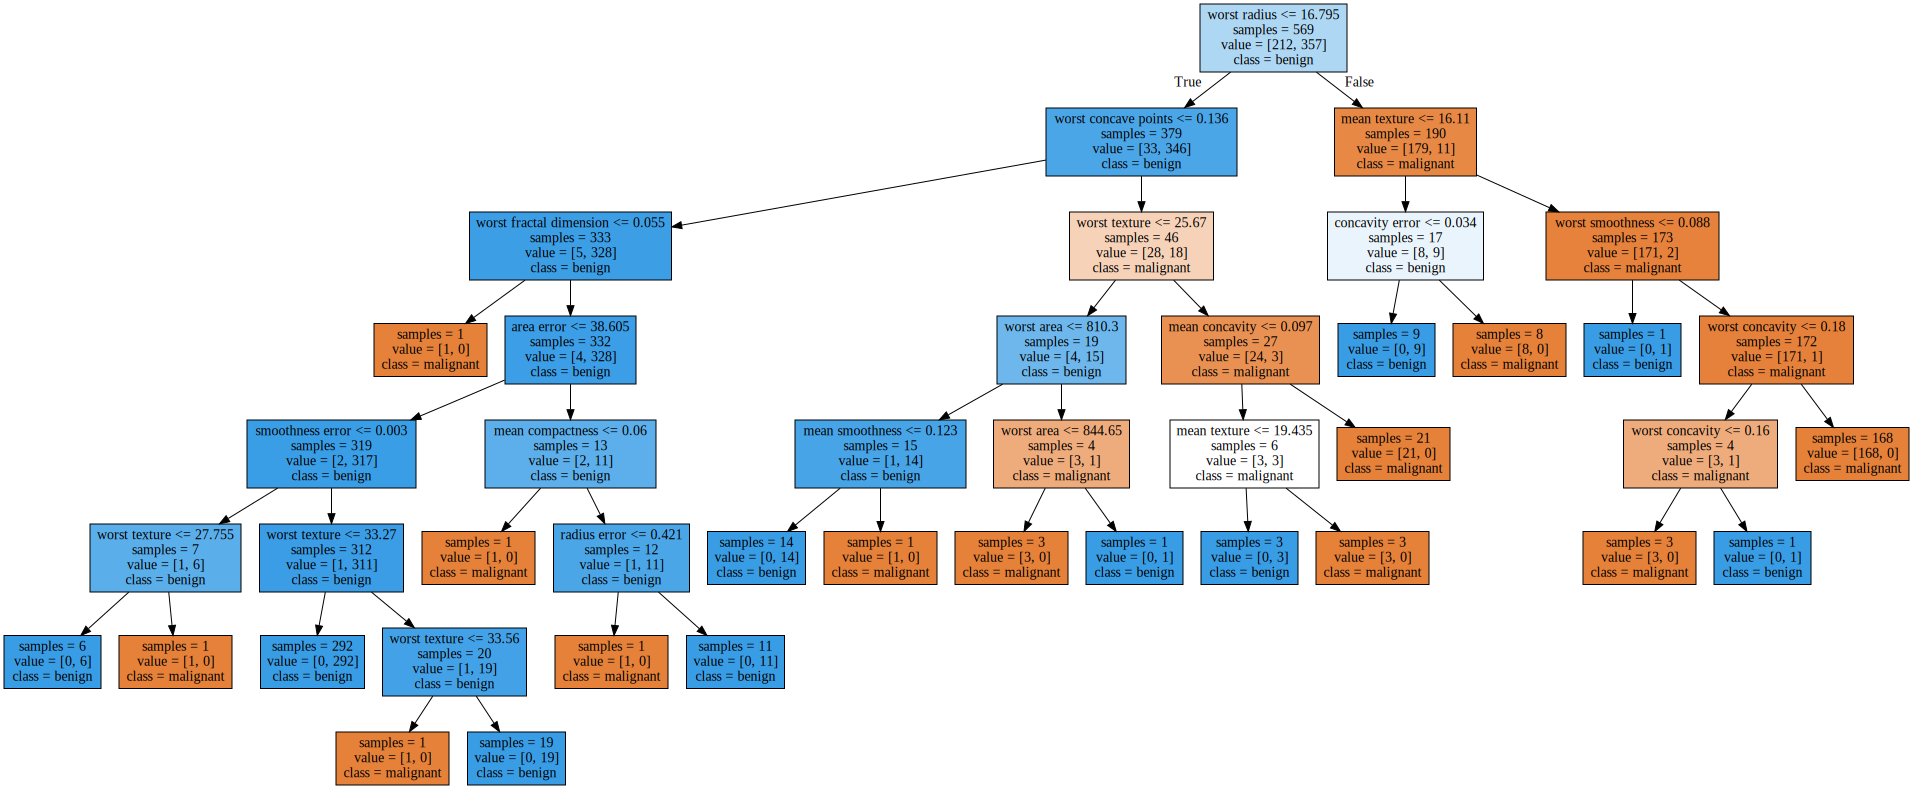

In [37]:
model = DecisionTreeClassifier()
model.fit(cancer.data, cancer.target)

from sklearn.tree import export_graphviz

export_graphviz(model,out_file='tree1.dot',class_names=cancer.target_names,
                feature_names=cancer.feature_names,impurity=False,filled=True)

import graphviz

with open('tree1.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [38]:
model.feature_importances_

array([0.        , 0.04248468, 0.        , 0.        , 0.00701689,
       0.00583135, 0.00877112, 0.        , 0.        , 0.        ,
       0.00689159, 0.        , 0.        , 0.00204521, 0.00100384,
       0.        , 0.03184137, 0.        , 0.        , 0.        ,
       0.69559352, 0.05252069, 0.        , 0.01672448, 0.00738798,
       0.        , 0.00747439, 0.10709688, 0.        , 0.007316  ])

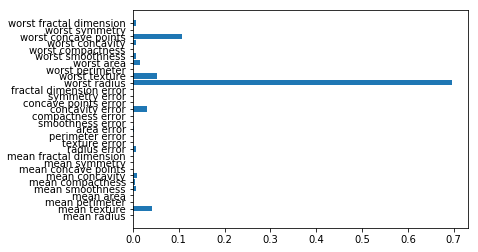

In [39]:
plt.barh(range(30), model.feature_importances_)
plt.yticks(range(30), cancer.feature_names)
pass